In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# EDA and Preprocessing

In [ ]:
df= pd.read_csv('/content/BMW_Data.csv')
df

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000
...,...,...,...,...,...,...,...
7207,2024-12-19,77.279999,77.279999,78.379997,76.900002,77.080002,1297262
7208,2024-12-20,77.580002,77.580002,77.860001,76.120003,76.699997,2000177
7209,2024-12-23,76.940002,76.940002,77.680000,76.260002,77.620003,642208
7210,2024-12-27,78.339996,78.339996,78.459999,76.739998,76.879997,958948


In [ ]:
df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000


In [ ]:
df.shape

(7212, 6)

there are 7212 rows and 6 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7212 non-null   object 
 1   Adj_Close  7212 non-null   float64
 2   Close      7212 non-null   float64
 3   High       7212 non-null   float64
 4   Low        7212 non-null   float64
 5   Open       7212 non-null   float64
 6   Volume     7212 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 394.5+ KB


there is one catogarical and 6 numeric features

In [ ]:
df['Date'].unique()

array(['1996-11-08', '1996-11-11', '1996-11-12', ..., '2024-12-23',
       '2024-12-27', '2024-12-30'], dtype=object)

In [ ]:
df.describe()

,Adj_Close,Close,High,Low,Open,Volume
count,7212.000000,7212.000000,7212.000000,7212.000000,7212.000000,7.212000e+03
mean,36.020199,56.427535,57.111143,55.720695,56.446728,2.107946e+06
std,23.641099,25.245886,25.415148,25.055661,25.252263,1.467180e+06
min,8.065074,17.040001,17.815001,16.000000,17.280001,0.000000e+00
25%,16.443254,34.457500,34.900002,33.887500,34.465001,1.194308e+06
50%,26.329212,49.372501,50.094999,48.752501,49.267500,1.793778e+06
75%,53.329208,79.332500,80.105000,78.342497,79.379997,2.636572e+06
max,108.059044,122.599998,123.750000,120.349998,123.300003,2.871954e+07


In [ ]:
df.isna().sum()

,0
Date,0
Adj_Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


 there are no null values

In [ ]:
df.duplicated().sum()

0

there are no duplicate values

Exploring patterns

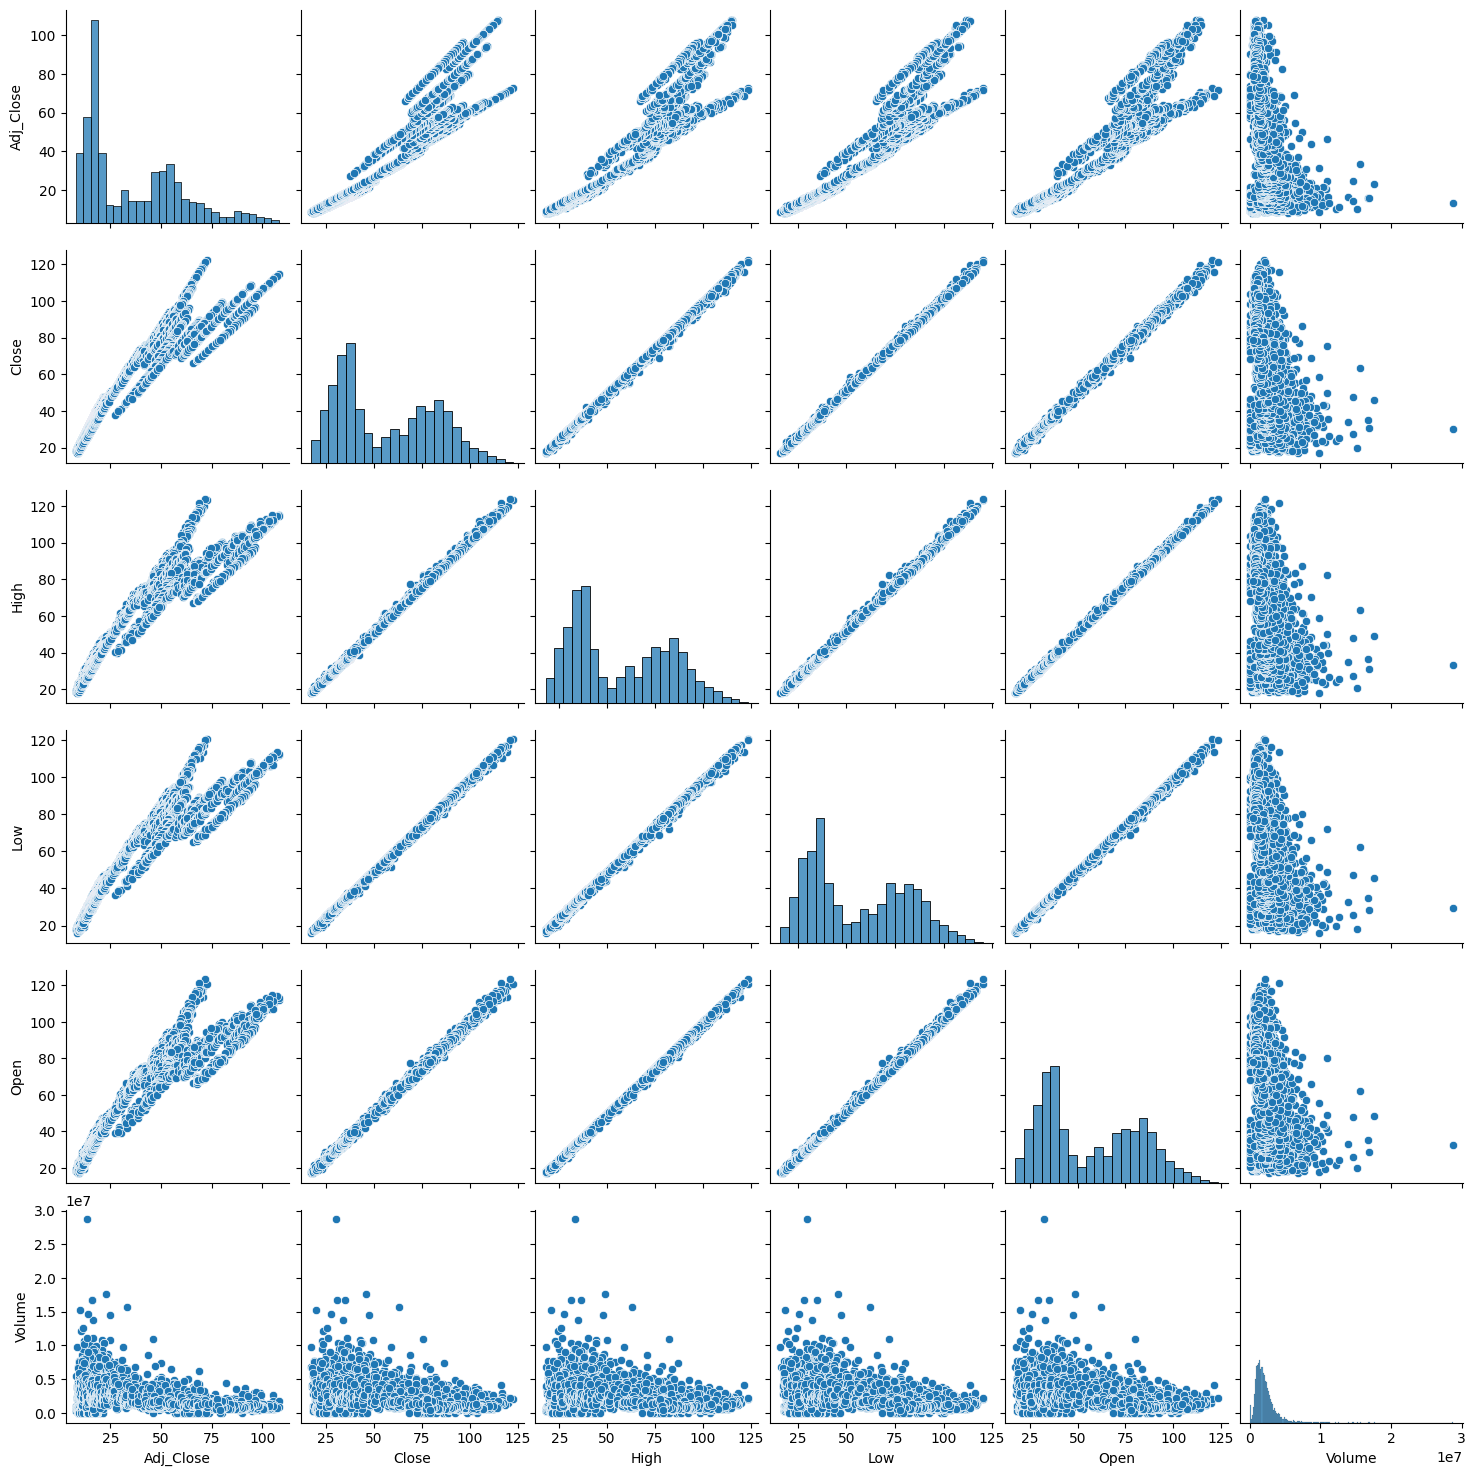

In [ ]:
sns.pairplot(df)
plt.show()

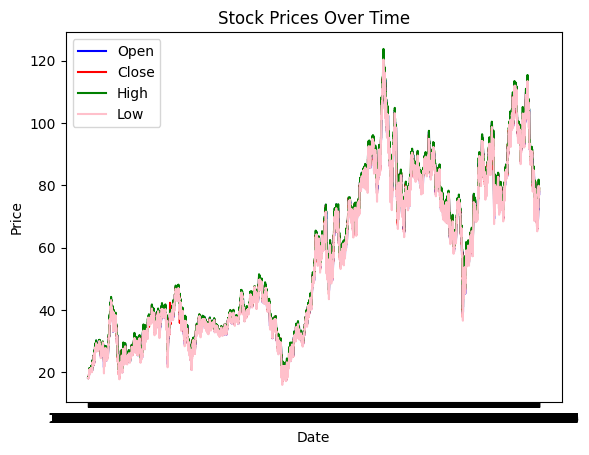

In [ ]:
plt.plot(df['Date'],df['Open'],label='Open',color='blue')
plt.plot(df['Date'],df['Close'],label='Close',color='red')
plt.plot(df['Date'],df['High'],label='High',color='green')
plt.plot(df['Date'],df['Low'],label='Low',color='pink')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()


In [ ]:
num_cols = ['Open', 'Close', 'High', 'Low', 'Volume', 'Adj_Close']

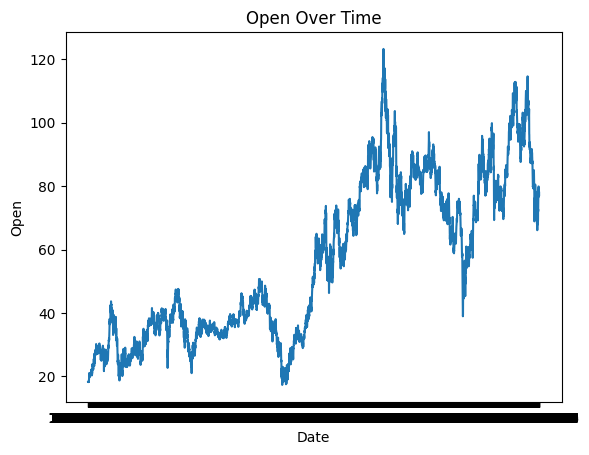

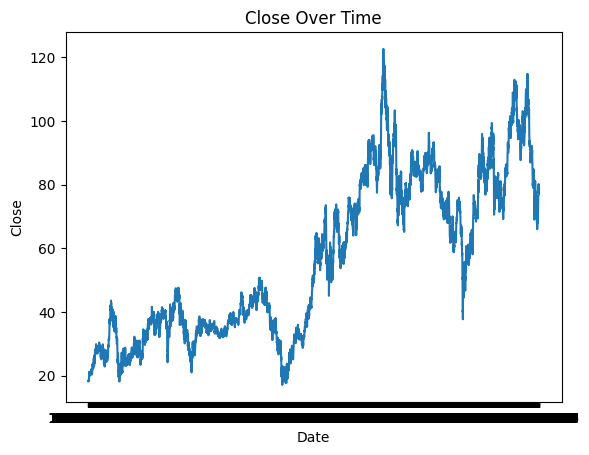

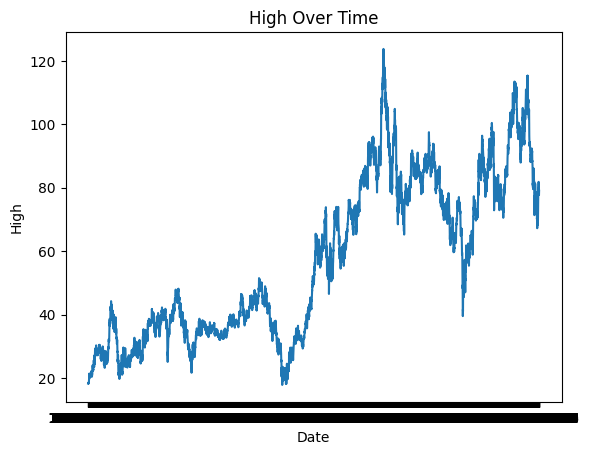

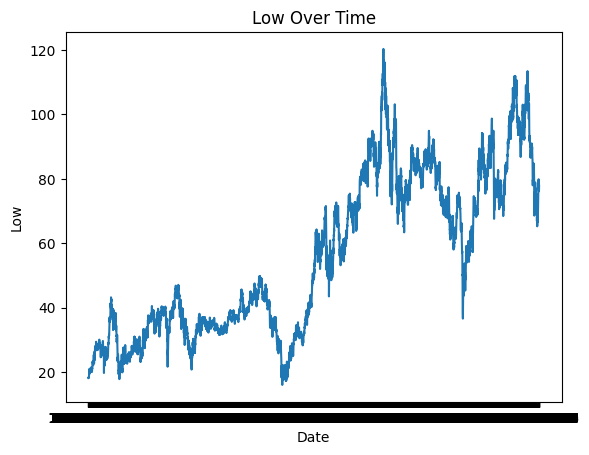

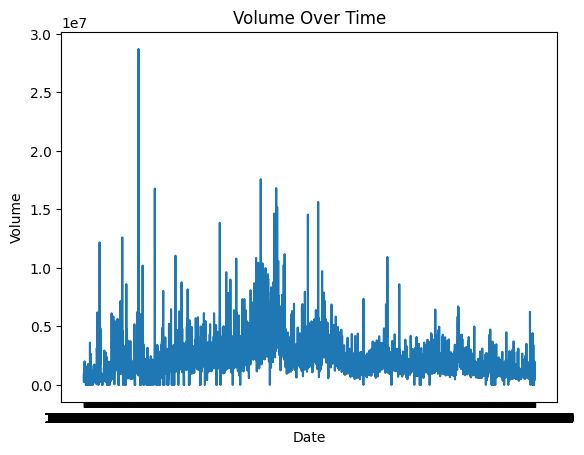

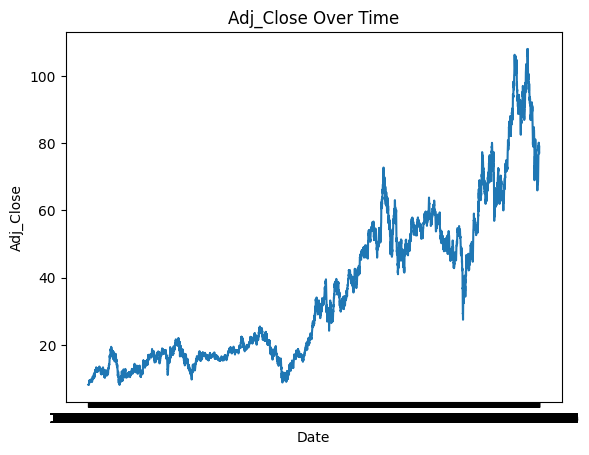

In [ ]:
for col in num_cols:
  sns.lineplot(x=df['Date'], y=df[col])
  plt.xlabel('Date')
  plt.ylabel(col)
  plt.title(f'{col} Over Time')
  plt.show()

#outlier detection

In [ ]:
num_cols = ['Open', 'Close', 'High', 'Low', 'Volume', 'Adj_Close']

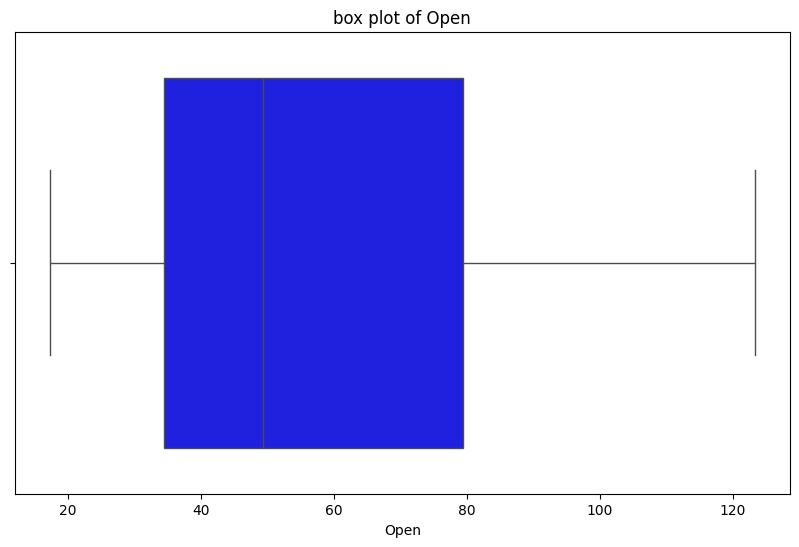

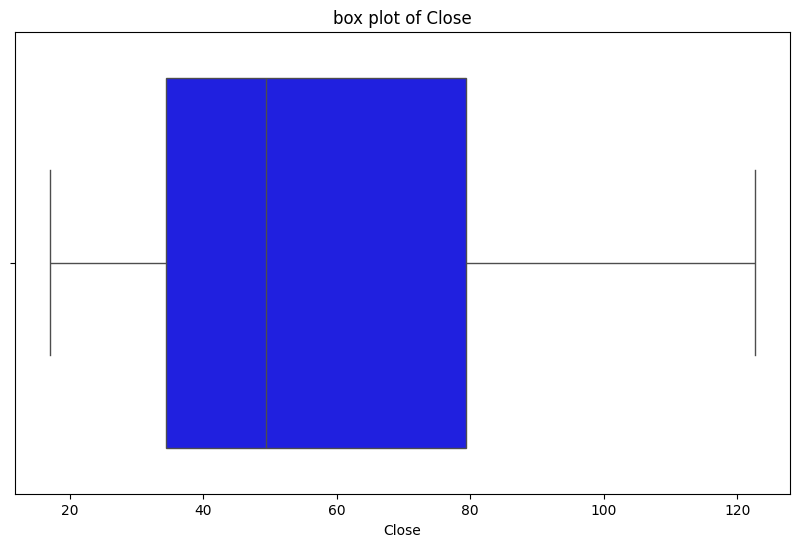

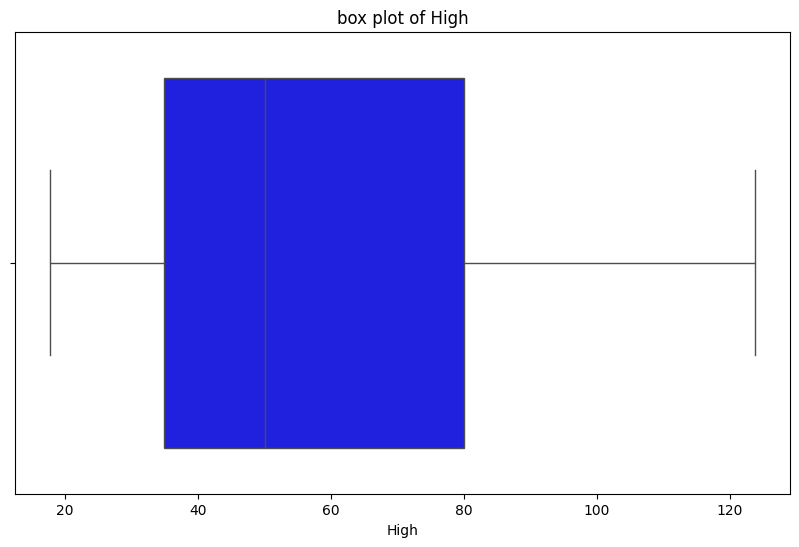

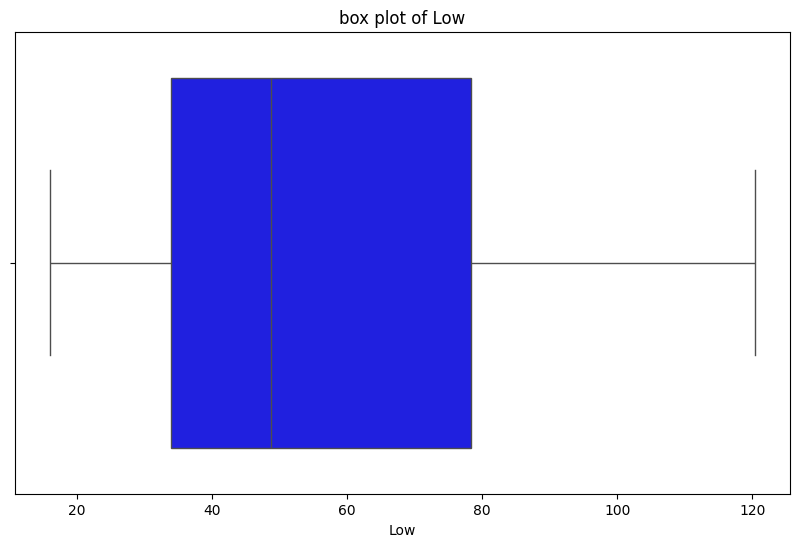

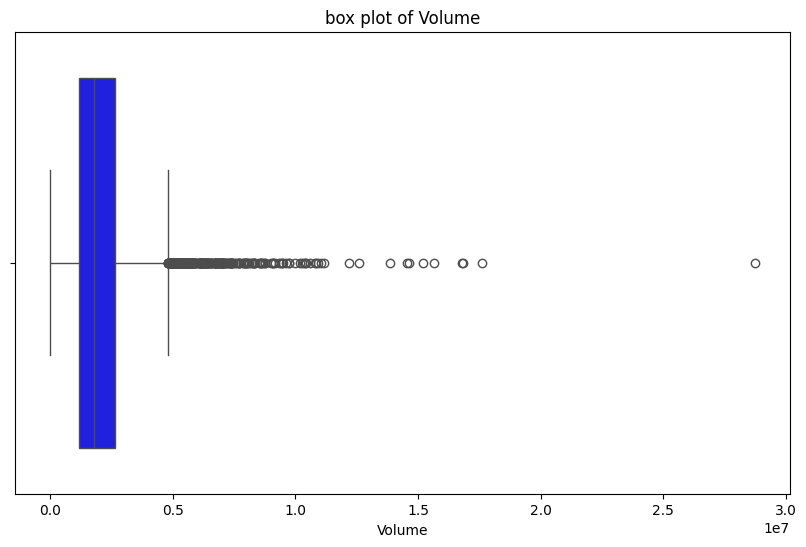

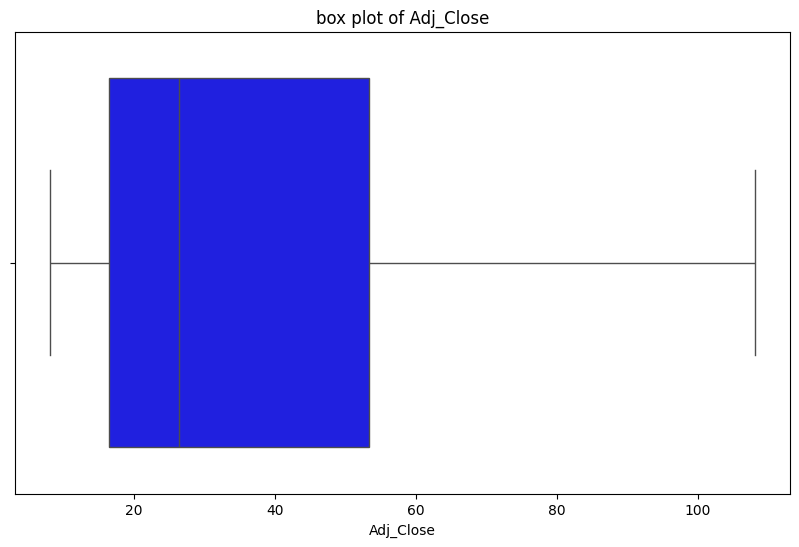

In [ ]:
for col in num_cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[col], color='blue')
  plt.title(f'box plot of {col}')
  plt.show()

#outliers **removed**

In [ ]:
q1=df['Volume'].quantile(0.25)
q3=df['Volume'].quantile(0.75)
iqr=q3-q1

In [ ]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [ ]:
df_ots=df[(df['Volume']>=lower_bound)]
df_ots=df[(df['Volume']<=upper_bound)]

In [ ]:
print(df_ots)

            Date  Adj_Close      Close       High        Low       Open  \
0     1996-11-08   8.100290  18.171000  18.209999  18.171000  18.209999   
1     1996-11-11   8.078445  18.122000  18.200001  18.082001  18.190001   
2     1996-11-12   8.139520  18.259001  18.327999  18.091999  18.160999   
3     1996-11-13   8.126592  18.230000  18.344000  18.190001  18.344000   
4     1996-11-14   8.152893  18.289000  18.289000  18.132000  18.205000   
...          ...        ...        ...        ...        ...        ...   
7207  2024-12-19  77.279999  77.279999  78.379997  76.900002  77.080002   
7208  2024-12-20  77.580002  77.580002  77.860001  76.120003  76.699997   
7209  2024-12-23  76.940002  76.940002  77.680000  76.260002  77.620003   
7210  2024-12-27  78.339996  78.339996  78.459999  76.739998  76.879997   
7211  2024-12-30  78.980003  78.980003  79.040001  77.839996  77.919998   

       Volume  
0      767000  
1      260000  
2     1066000  
3      793000  
4      351000  
...

In [ ]:
df['Volume'] = df['Volume'].astype(float)

In [ ]:
df=df.drop('Date',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj_Close  7212 non-null   float64
 1   Close      7212 non-null   float64
 2   High       7212 non-null   float64
 3   Low        7212 non-null   float64
 4   Open       7212 non-null   float64
 5   Volume     7212 non-null   float64
dtypes: float64(6)
memory usage: 338.2 KB


In [ ]:
df.columns

Index(['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

# splitting the data

In [ ]:
x=df.drop('Close',axis=1)
y=df['Close']

In [ ]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

# model selection

1. Linear Regression: Use when you think the data has a straight-line relationship.


2. Decision Tree: Use when the data is more complex and can be split into different groups based on features.

# linear regression

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Mean Squared Error: 0.40768659288903675
Mean Absolute Error: 0.41142472520443524
R2 Score: 0.9993527641661086


Text(0, 0.5, 'Predicted Prices')

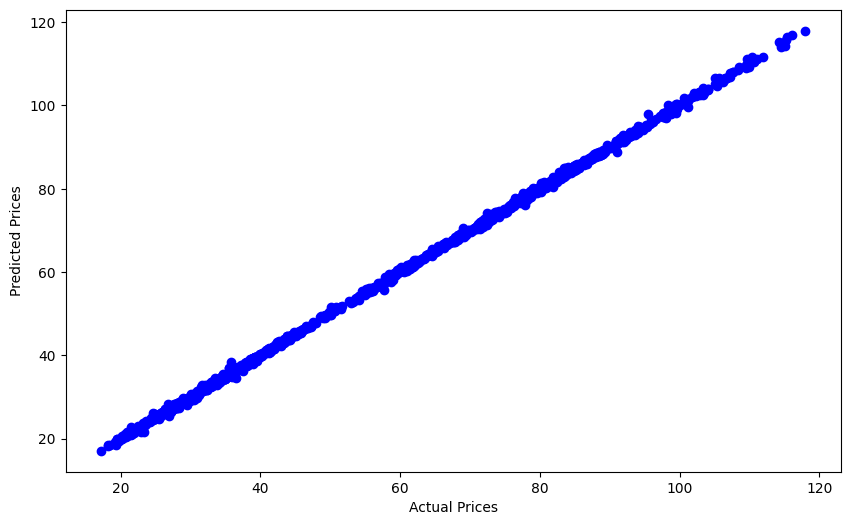

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf_dt=DecisionTreeRegressor(random_state=42)
clf_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred=clf_dt.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Mean Squared Error: 0.40768659288903675
Mean Absolute Error: 0.41142472520443524
R2 Score: 0.9993527641661086


both the algorithms gives same scores